**Datacamp Project**

The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!


The gender most commonly awarded in the Nobel Prize's history is: Male
The country most commonly awarded in the Nobel Prize's history is: United States of America

The decade that had the highest ratio of US-born winners is: 2000


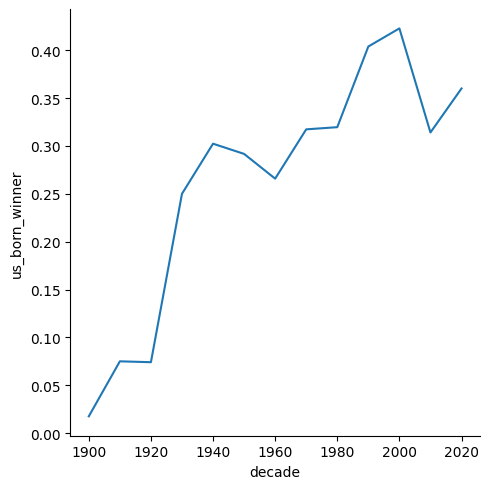


 The decade and category combination that had the highest ratio of female winners winners is: {2020: 'Literature'}


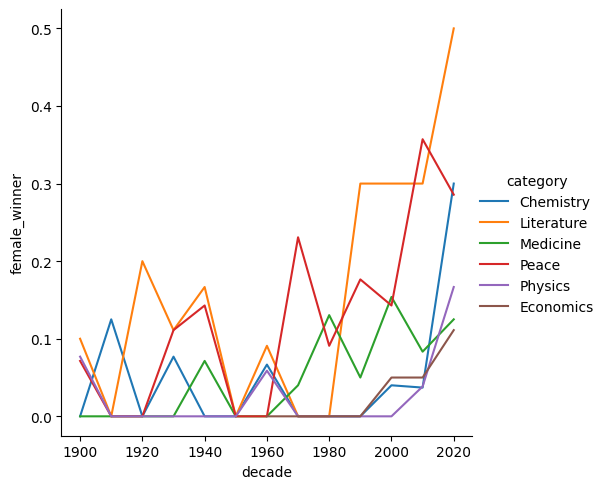


 The first woman to win a Nobel Prize was Marie Curie, née Sklodowska, in the category of Physics.

 The repeat winners are : ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


In [14]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#0. Loading dataset into a pandas DataFrame
nobel = pd.read_csv("data/nobel.csv")
nobel.head()

#1. Finding most common gender and birth country
top_gender = nobel["sex"].value_counts().index[0]

top_country = nobel["birth_country"].value_counts().index[0]

print("\nThe gender most commonly awarded in the Nobel Prize's history is:", top_gender)
print("The country most commonly awarded in the Nobel Prize's history is:", top_country)

#####

#2. Identifying decade with highest ratio of US-born winners

#Creating US-born winners column
nobel['us_born_winner'] = nobel['birth_country'] == 'United States of America'

#Creating decade column
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)

#Creating ratio
ratio_us_winners = nobel.groupby('decade', as_index=False)['us_born_winner'].mean()

#Identifying decade with highest ratio
max_decade_usa = ratio_us_winners[ratio_us_winners['us_born_winner'] == ratio_us_winners['us_born_winner'].max()]['decade'].values[0]

print("\nThe decade that had the highest ratio of US-born winners is:", max_decade_usa)

#Optional - Creating relational line plot for US-born winners
sns.relplot(x='decade', y='us_born_winner', data=ratio_us_winners, kind="line")
plt.show()

#####

#3. Finding decade and category with highest proportion of female recipients

#Creating Female winners column
nobel['female_winner'] = nobel['sex'] == 'Female'

#Creating decade column - **Not necessary because it already exists**
#nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)

#Creating ratio and grouping by decade and category
ratio_fem_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

#Identifying decade and category with highest female winners ratio
max_fem_decade_category = ratio_fem_winners[ratio_fem_winners['female_winner'] == ratio_fem_winners['female_winner'].max()][['decade', 'category']]

#Creating decade and category pair with highest female winners ratio
max_female_dict = {max_fem_decade_category['decade'].values[0]: max_fem_decade_category['category'].values[0]}

print(f"\n The decade and category combination that had the highest ratio of female winners winners is:", max_female_dict)

#Additional - Creating relational line plot for Female winners by decade and category
sns.relplot(x='decade', y='female_winner', data=ratio_fem_winners, kind="line", hue='category')
plt.show()

#####

#4. Finding 1st woman to win a Nobel Prize

#Filtering female winner column
nobel_women = nobel[nobel['female_winner']]

#Finding minimum year value in female winner column
min_row = nobel_women[nobel_women['year'] == nobel_women['year'].min()]

#Finding name and category of 1st woman winner
first_woman_name = min_row['full_name'].values[0]
first_woman_category = min_row['category'].values[0]

print(f"\n The first woman to win a Nobel Prize was {first_woman_name}, in the category of {first_woman_category}.")

#####

#5. Determining repeat winners

#Counting winners names
winner_count = nobel['full_name'].value_counts()

#Determining if there are any names that repeat
repeats = winner_count[winner_count >= 2].index

#Creating list of names
repeat_list = list(repeats)

print("\n The repeat winners are :", repeat_list)